In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

In [11]:
from vegModel import vegModel
Es_1d    ={'rhs':"normal",
           'n':(1024,),
           'l':(256.0,),
           'bc':"periodic",
           'it':"pseudo_spectral",
           'dt':0.1,
           'analyze':True,
           'verbose':True,
           'setPDE':True}
eta_rho =  [(3.421945725500000091e+00, 1.136291445400000079e-03),
            (3.412937193799999935e+00, 9.982219974600000170e-03),
            (3.323078563000000152e+00, 9.999999890100000344e-02),
            (3.227071132399999875e+00, 1.999432310200000007e-01),
            (3.090017596800000099e+00, 3.499496087000000255e-01),
            (2.999961518300000129e+00, 4.536235540799999910e-01),
            (2.321876860700000211e+00, 1.399952457499999969e+00),
            (1.999999998400000090e+00, 1.985519237899999956e+00),
            (1.992769139199999984e+00, 1.999970545100000052e+00),
            (1.556915407199999990e+00, 2.999998570799999875e+00),
            (1.216154001600000090e+00, 3.999993769200000049e+00),
            (9.384933219200000121e-01, 5.000000393399999687e+00),
            (7.047132087799999889e-01, 5.999995190399999956e+00),
            (5.025357171000000012e-01, 6.999985632499999610e+00),
            (3.237167218900000032e-01, 7.999984581899999725e+00),
            (1.624928677599999927e-01, 8.999990493900000388e+00),
            (1.470341472800000028e-02, 9.999995316399999723e+00)]
Ps        = {'p':0.7,'l':1.428571429,'g':0.457142857,'a':0.0,
             'omegaf':0.5983986006837702,
             'e':eta_rho[0][0],'r':eta_rho[0][1],
             'diffusion':[1.0,150.0/1.2]}
m=vegModel(Ps,Es_1d,Vs="random")

dbdt =  b*w*(-b + 1.0)*(b*e + 1.0)**2 - b
dwdt  =  -b*g*w*(b*e + 1.0)**2 - l*w/(b*r + 1.0) + p*(a*cos(omegaf*t) + 1.0)
Local Jacobian: Matrix([[2*b*e*w*(-b + 1.0)*(b*e + 1.0) - b*w*(b*e + 1.0)**2 + w*(-b + 1.0)*(b*e + 1.0)**2 - 1, b*(-b + 1.0)*(b*e + 1.0)**2], [-2*b*e*g*w*(b*e + 1.0) - g*w*(b*e + 1.0)**2 + l*r*w/(b*r + 1.0)**2, -b*g*(b*e + 1.0)**2 - l/(b*r + 1.0)]])
Linear analysis Jacobian:  Matrix([[2*b*e*w*(-b + 1.0)*(b*e + 1.0) - b*w*(b*e + 1.0)**2 - k**2 + w*(-b + 1.0)*(b*e + 1.0)**2 - 1, b*(-b + 1.0)*(b*e + 1.0)**2], [-2*b*e*g*w*(b*e + 1.0) - g*w*(b*e + 1.0)**2 + l*r*w/(b*r + 1.0)**2, -b*g*(b*e + 1.0)**2 - delta_s*k**2 - l/(b*r + 1.0)]])
Creating 1D laplacian
Laplacian created
Time to setup:  6.22029209137


<IPython.core.display.Javascript object>


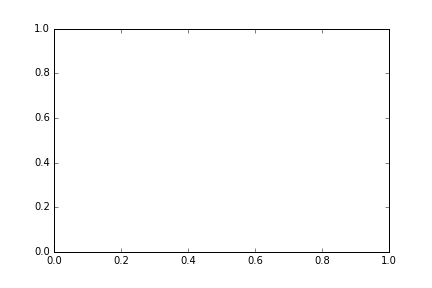

KeyboardInterrupt: 

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

m.time_elapsed=0
step=10
finish=1000
state = m.initial_state
b,w=state.reshape(m.setup['nvar'],*m.setup['n'])
plt.ylim([0,1])
plt.xlim([0,m.setup['l'][0]])
plt.ion()
plt.plot(m.X,b,'g')
while m.time_elapsed<=finish:
    t,state = m.integrator(m.state,step=step,finish=step)
    b,w=state[-1].reshape(m.setup['nvar'],*m.setup['n'])
    plt.plot(m.X,b,'g')